In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2000)

import matplotlib.pyplot as plt
import seaborn as sns 
# hide warnings
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics

####  Data Reading

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Data Understanding**

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


###### We can observe outliers from the above table will handle them later

In [5]:
data.shape

(1460, 81)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#calculate null in columns.
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

**Data cleaning**

*  Dropping of id col as it has no significance

In [8]:
data = data.drop(columns=["Id"])

In [9]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


*  From data dictionary many columns contain NA will handle them first

In [10]:
# Alley
data['Alley'].fillna('No Alley', inplace=True)
data['Alley'].value_counts()

No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [11]:
#It clear data is skewed and can be dropepd
data = data.drop(['Alley'],axis=1)

In [12]:
#BsmtQual cleaning
data['BsmtQual'].fillna('No Basement', inplace=True)
data['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

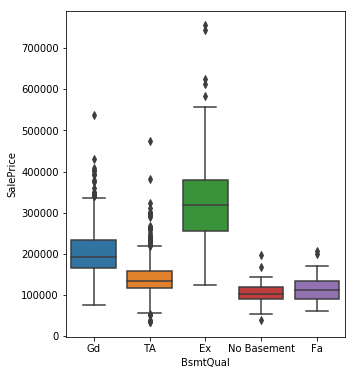

In [13]:
plt.figure(figsize=(5, 6))
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = data)

In [14]:
#Since No basement and Fair are not showing much variance with price combining them to others
data['BsmtQual'].replace({'No Basement':'Others'},inplace=True)
data['BsmtQual'].replace({'Fa':'Others'},inplace=True)
data['BsmtQual'].value_counts()

TA        649
Gd        618
Ex        121
Others     72
Name: BsmtQual, dtype: int64

In [15]:
#Basement condition
data['BsmtCond'].fillna('No Basement', inplace=True)
data['BsmtCond'].value_counts()


TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

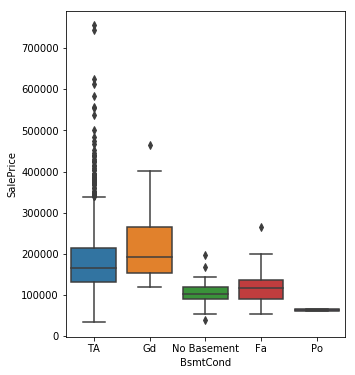

In [16]:
plt.figure(figsize=(5, 6))
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = data)

In [17]:
# Three levels of fair/good quality can be combined as OK 
data['BsmtCond'].replace({'Fa':'OK'},inplace=True)
data['BsmtCond'].replace({'TA':'OK'},inplace=True)
data['BsmtCond'].replace({'Gd':'OK'},inplace=True)
# Two levels of poor quality can be combined as Not OK (Po, No Basement)
data['BsmtCond'].replace({'Po':'Not OK'},inplace=True)
data['BsmtCond'].replace({'No Basement':'Not OK'},inplace=True)
data['BsmtCond'].value_counts()


OK        1421
Not OK      39
Name: BsmtCond, dtype: int64

In [18]:
#BsmtExposure: Refers to walkout or garden level walls
data['BsmtExposure'].fillna('No Basement', inplace=True)
data['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

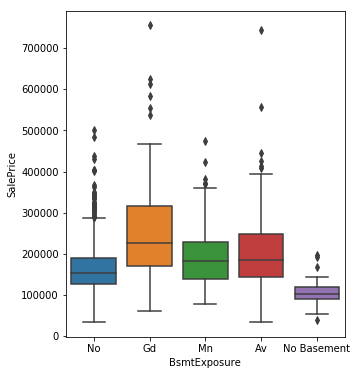

In [19]:
plt.figure(figsize=(5, 6))
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = data)

In [20]:
data['BsmtExposure'].replace({'Gd':'OK'},inplace=True)
data['BsmtExposure'].replace({'Mn':'OK'},inplace=True)
data['BsmtExposure'].replace({'Av':'OK'},inplace=True)
data['BsmtExposure'].value_counts()

No             953
OK             469
No Basement     38
Name: BsmtExposure, dtype: int64

In [21]:
#BsmtFinType1: Rating of basement finished area
data['BsmtFinType1'].fillna('No Basement', inplace=True)
data['BsmtFinType1'].value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [22]:
#BsmtFinType2: Rating of basement finished area
data['BsmtFinType2'].fillna('No Basement', inplace=True)
data['BsmtFinType2'].value_counts()

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [23]:
#FireplaceQu: Fireplace quality
data['FireplaceQu'].fillna('No Fireplace', inplace=True)
data['FireplaceQu'].value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

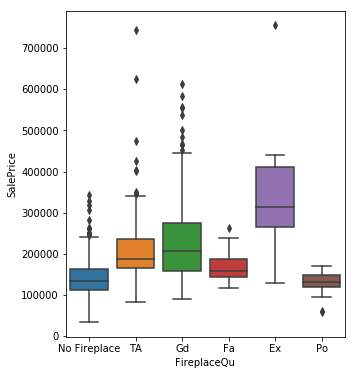

In [24]:
plt.figure(figsize=(5, 6))
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = data)

In [25]:
data['FireplaceQu'].replace({'Fa':'OK Fireplace'},inplace=True)
data['FireplaceQu'].replace({'TA':'OK Fireplace'},inplace=True)
data['FireplaceQu'].replace({'Gd':'OK Fireplace'},inplace=True)
data['FireplaceQu'].replace({'Ex':'OK Fireplace'},inplace=True)
data['FireplaceQu'].replace({'Po':'Not OK Fireplace'},inplace=True)
data['FireplaceQu'].replace({'No Fireplace':'Not OK Fireplace'},inplace=True)
data['FireplaceQu'].value_counts()

OK Fireplace        750
Not OK Fireplace    710
Name: FireplaceQu, dtype: int64

In [26]:
#GarageType: Garage location
data['GarageType'].fillna('No Garage', inplace=True)
data['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [27]:
#GarageFinish: Interior finish of the garage
data['GarageFinish'].fillna('No Garage', inplace=True)
data['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [28]:
#GarageQual: Garage quality
data['GarageQual'].fillna('No Garage', inplace=True)
data['GarageQual'].value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64

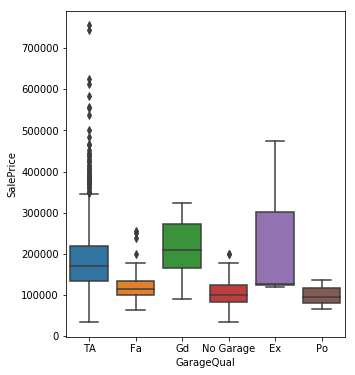

In [29]:
plt.figure(figsize=(5, 6))
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = data)

In [30]:
data['GarageQual'].replace({'TA':'OK Garage'},inplace=True)
data['GarageQual'].replace({'Fa':'OK Garage'},inplace=True)
data['GarageQual'].replace({'Gd':'OK Garage'},inplace=True)
data['GarageQual'].replace({'Ex':'OK Garage'},inplace=True)
data['GarageQual'].replace({'Po':'No Garage'},inplace=True)
data['GarageQual'].value_counts()

OK Garage    1376
No Garage      84
Name: GarageQual, dtype: int64

In [31]:
#GarageCond: Garage condition
data['GarageCond'].fillna('No Garage', inplace=True)
data['GarageCond'].value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [32]:
data['GarageCond'].replace({'TA':'OK'},inplace=True)
data['GarageCond'].replace({'Fa':'OK'},inplace=True)
data['GarageCond'].replace({'Gd':'OK'},inplace=True)
data['GarageCond'].replace({'Ex':'OK'},inplace=True)
data['GarageCond'].replace({'Po':'No Garage'},inplace=True)
data['GarageCond'].value_counts()

OK           1372
No Garage      88
Name: GarageCond, dtype: int64

In [33]:
#PoolQC: Pool quality
data['PoolQC'].fillna('No Pool', inplace=True)
data['PoolQC'].value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [34]:
data['PoolQC'].replace({'Fa':'OK Pool'},inplace=True)
data['PoolQC'].replace({'Gd':'OK Pool'},inplace=True)
data['PoolQC'].replace({'Ex':'OK Pool'},inplace=True)
data['PoolQC'].value_counts()
print(100*(data['PoolQC'].value_counts()/data['PoolQC'].count()))

No Pool    99.520548
OK Pool     0.479452
Name: PoolQC, dtype: float64


In [35]:
#We can drop this column as its mostly single valued
data = data.drop(['PoolQC'],axis=1)

In [36]:
#Fence: Fence quality
data['Fence'].fillna('No Fence', inplace=True)
data['Fence'].value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [37]:
data['Fence'].replace({'MnPrv':'Fence'},inplace=True)
data['Fence'].replace({'GdPrv':'Fence'},inplace=True)
data['Fence'].replace({'GdWo':'Fence'},inplace=True)
data['Fence'].replace({'MnWw':'Fence'},inplace=True)
data['Fence'].value_counts()

No Fence    1179
Fence        281
Name: Fence, dtype: int64

In [38]:
#MiscFeature: Miscellaneous feature not covered in other categories
data['MiscFeature'].fillna('None', inplace=True)
data['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [39]:
#  data.isnull().sum()

In [40]:
#LotFrontAge imputing its null values
data['LotFrontage'].fillna(0, inplace=True) 
data['LotFrontage']=data['LotFrontage'].values.astype(np.int64)
data['LotFrontage'].head()

0    65
1    80
2    68
3    60
4    84
Name: LotFrontage, dtype: int64

In [41]:
data.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [42]:
#derived Year columns
current_year = 2020
data['YearBuilt_Old'] = current_year-data.YearBuilt
data['YearRemodAdd_Old'] = current_year-data.YearRemodAdd
data['GarageYrBlt_Old'] = current_year-data.GarageYrBlt
data['YrSold_Old'] = current_year-data.YrSold
data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
726,1988,2007,1988.0,2009,32,13,32.0,11
549,2003,2004,2003.0,2009,17,16,17.0,11
1455,1999,2000,1999.0,2007,21,20,21.0,13
812,1952,1952,1952.0,2010,68,68,68.0,10
105,2003,2004,2003.0,2008,17,16,17.0,12
1337,1941,1950,NaN,2006,79,70,NaN,14
857,1994,1995,1994.0,2009,26,25,26.0,11
59,1972,1972,1973.0,2008,48,48,47.0,12
277,1951,1951,1951.0,2010,69,69,69.0,10
363,1972,2007,1972.0,2009,48,13,48.0,11


In [43]:
#removing original years col
data = data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [44]:
#removing year sold also as it doesnt make impact
data = data.drop(['YrSold_Old'],axis=1)

In [45]:
#imputing null values
data.GarageYrBlt_Old.fillna(-1,inplace=True)
data['GarageYrBlt_Old'].head()

0    17.0
1    44.0
2    19.0
3    22.0
4    20.0
Name: GarageYrBlt_Old, dtype: float64

In [46]:
data.MasVnrType.fillna('None',inplace=True)
data.MasVnrArea.fillna(0,inplace=True)

In [47]:
#electrical 
data.Electrical.fillna('Unknown',inplace=True)
data.Electrical.value_counts()

SBrkr      1334
FuseA        94
FuseF        27
FuseP         3
Mix           1
Unknown       1
Name: Electrical, dtype: int64

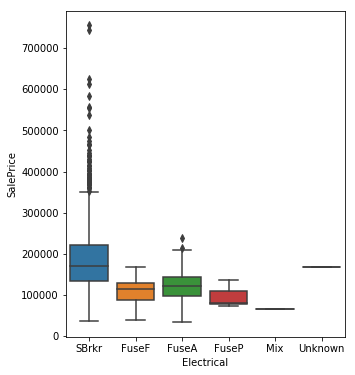

In [48]:
plt.figure(figsize=(5, 6))
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = data)

In [49]:
#not much variance given by FuseF A and P 
data['Electrical'].replace({'FuseA':'Other'},inplace=True)
data['Electrical'].replace({'FuseF':'Other'},inplace=True)
data['Electrical'].replace({'FuseP':'Other'},inplace=True)
data['Electrical'].replace({'Mix':'Other'},inplace=True)
data['Electrical'].replace({'Unknown':'Other'},inplace=True)
data.Electrical.value_counts()

SBrkr    1334
Other     126
Name: Electrical, dtype: int64

In [50]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath  

In [51]:
data.nunique().sort_values(ascending =True)


Electrical             2
BsmtCond               2
Fence                  2
CentralAir             2
GarageQual             2
FireplaceQu            2
Utilities              2
GarageCond             2
Street                 2
LandSlope              3
PavedDrive             3
BsmtHalfBath           3
BsmtExposure           3
HalfBath               3
KitchenAbvGr           4
BsmtQual               4
KitchenQual            4
ExterQual              4
MasVnrType             4
LandContour            4
GarageFinish           4
LotShape               4
Fireplaces             4
BsmtFullBath           4
FullBath               4
HeatingQC              5
ExterCond              5
BldgType               5
MSZoning               5
GarageCars             5
MiscFeature            5
LotConfig              5
Heating                6
Foundation             6
SaleCondition          6
RoofStyle              6
BsmtFinType1           7
BsmtFinType2           7
GarageType             7
Functional             7


In [52]:
data.shape

(1460, 77)

#### Treating outliers 

[]

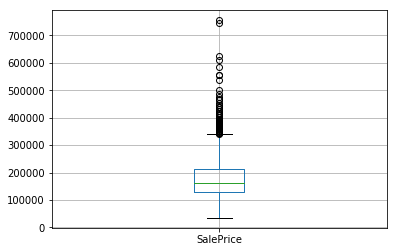

In [53]:
#look for outliers in sale price
ax = data.boxplot(column=['SalePrice'])
plt.plot()

In [54]:
outlier_col = ['LotArea','MasVnrArea','ScreenPorch','MiscVal','PoolArea','3SsnPorch','TotalBsmtSF','BsmtFinSF1',
               'BsmtFinSF2','EnclosedPorch','OpenPorchSF']

def drop_outliers(x):
    list = []
    for col in outlier_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   
final_dataframe = drop_outliers(data)

In [55]:
final_dataframe.shape

(1441, 77)

In [56]:
final_dataframe.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.0,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,56.818182,57.410826,10025.664816,6.092991,5.571131,102.775156,436.698820,45.505899,569.063845,1051.268563,1157.319917,344.181818,5.649549,1507.151284,0.421235,0.056905,1.561416,0.383761,2.861207,1.045802,6.503817,0.603053,1.767523,472.123525,93.302568,46.553782,21.759889,3.102012,14.837613,0.0,16.997918,6.331020,180112.231783,48.677307,35.181818,39.055517
std,42.187465,33.629670,5463.989139,1.379296,1.110230,180.089513,432.610384,160.254975,442.617790,416.210745,373.572700,432.813756,47.868367,505.896946,0.514586,0.237659,0.549504,0.501927,0.814897,0.218862,1.609052,0.636258,0.748666,212.577806,123.769993,66.047279,59.778706,26.339952,54.822808,0.0,108.909905,2.709949,78048.215908,30.286032,20.684441,25.904359
min,20.000000,0.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,34900.000000,10.000000,10.000000,-1.000000
25%,20.000000,43.000000,7500.000000,5.000000,5.000000,0.000000,0.000000,0.000000,225.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,129900.000000,19.000000,16.000000,17.000000
50%,50.000000,63.000000,9439.000000,6.000000,5.000000,0.000000,379.000000,0.000000,481.000000,990.000000,1082.000000,0.000000,0.000000,1458.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,162000.000000,47.000000,26.000000,35.000000
75%,70.000000,79.000000,11500.000000,7.000000,6.000000,164.000000,706.000000,0.000000,811.000000,1286.000000,1383.000000,728.000000,0.000000,1771.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,213250.000000,66.000000,53.000000,58.000000
max,190.000000,313.000000,70761.000000,10.000000,9.000000,1600.000000,2260.000000,1474.000000,2336.000000,3206.000000,3228.000000,1872.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1390.000000,857.000000,547.000000,386.000000,407.000000,480.000000,0.0,1400.000000,12.000000,755000.000000,148.000000,70.000000,120.000000


#### Visualising differnt features 

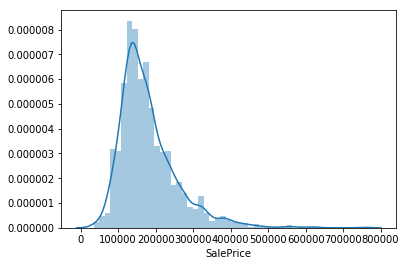

In [57]:
sns.distplot(final_dataframe['SalePrice'])
plt.show()

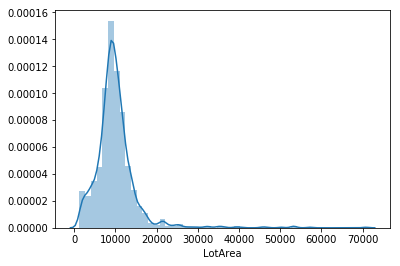

In [58]:
sns.distplot(final_dataframe['LotArea'])
plt.show()

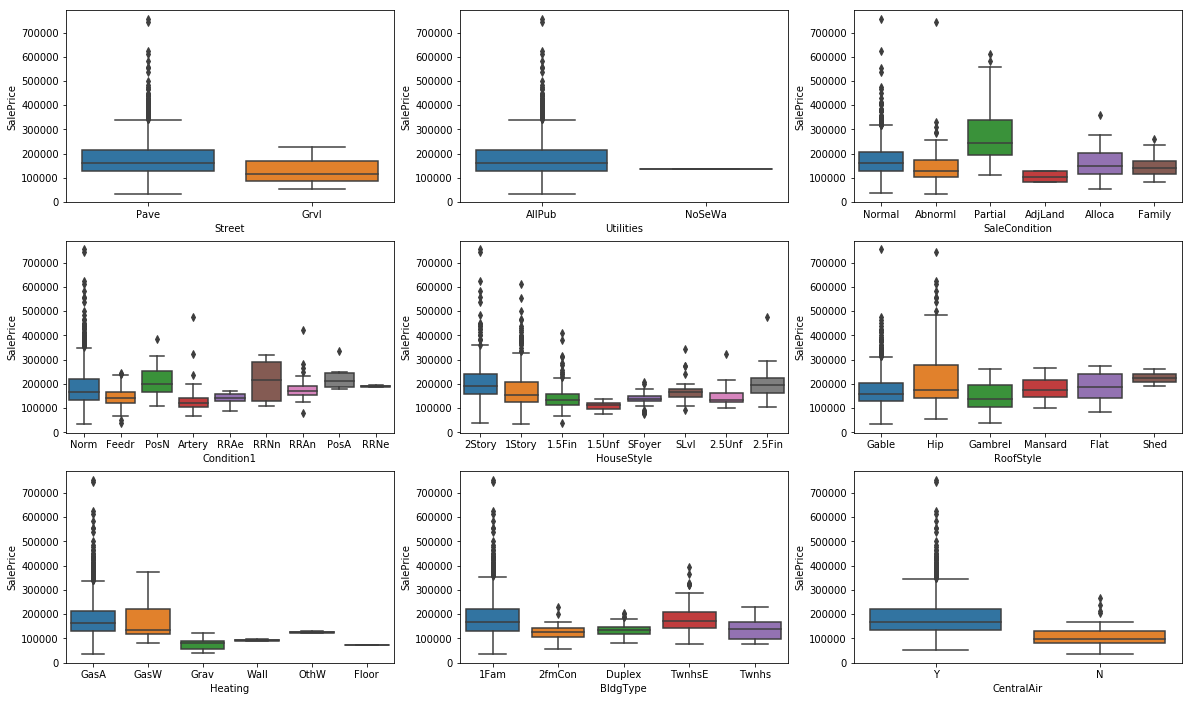

In [59]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Street', y = 'SalePrice', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = data)
plt.subplot(3,3,8)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = data)
plt.subplot(3,3,9)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = data)
plt.show()

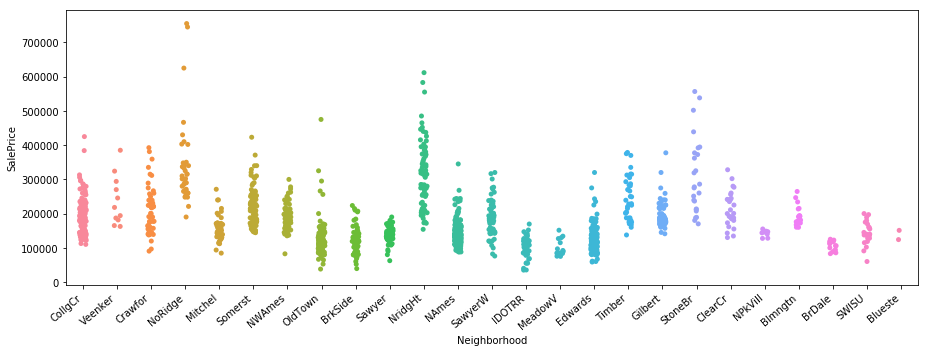

In [60]:
#ploting neighbourhood vs price 
plt.figure(figsize = (13, 5))
ax = sns.stripplot(x = 'Neighborhood', y = 'SalePrice', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

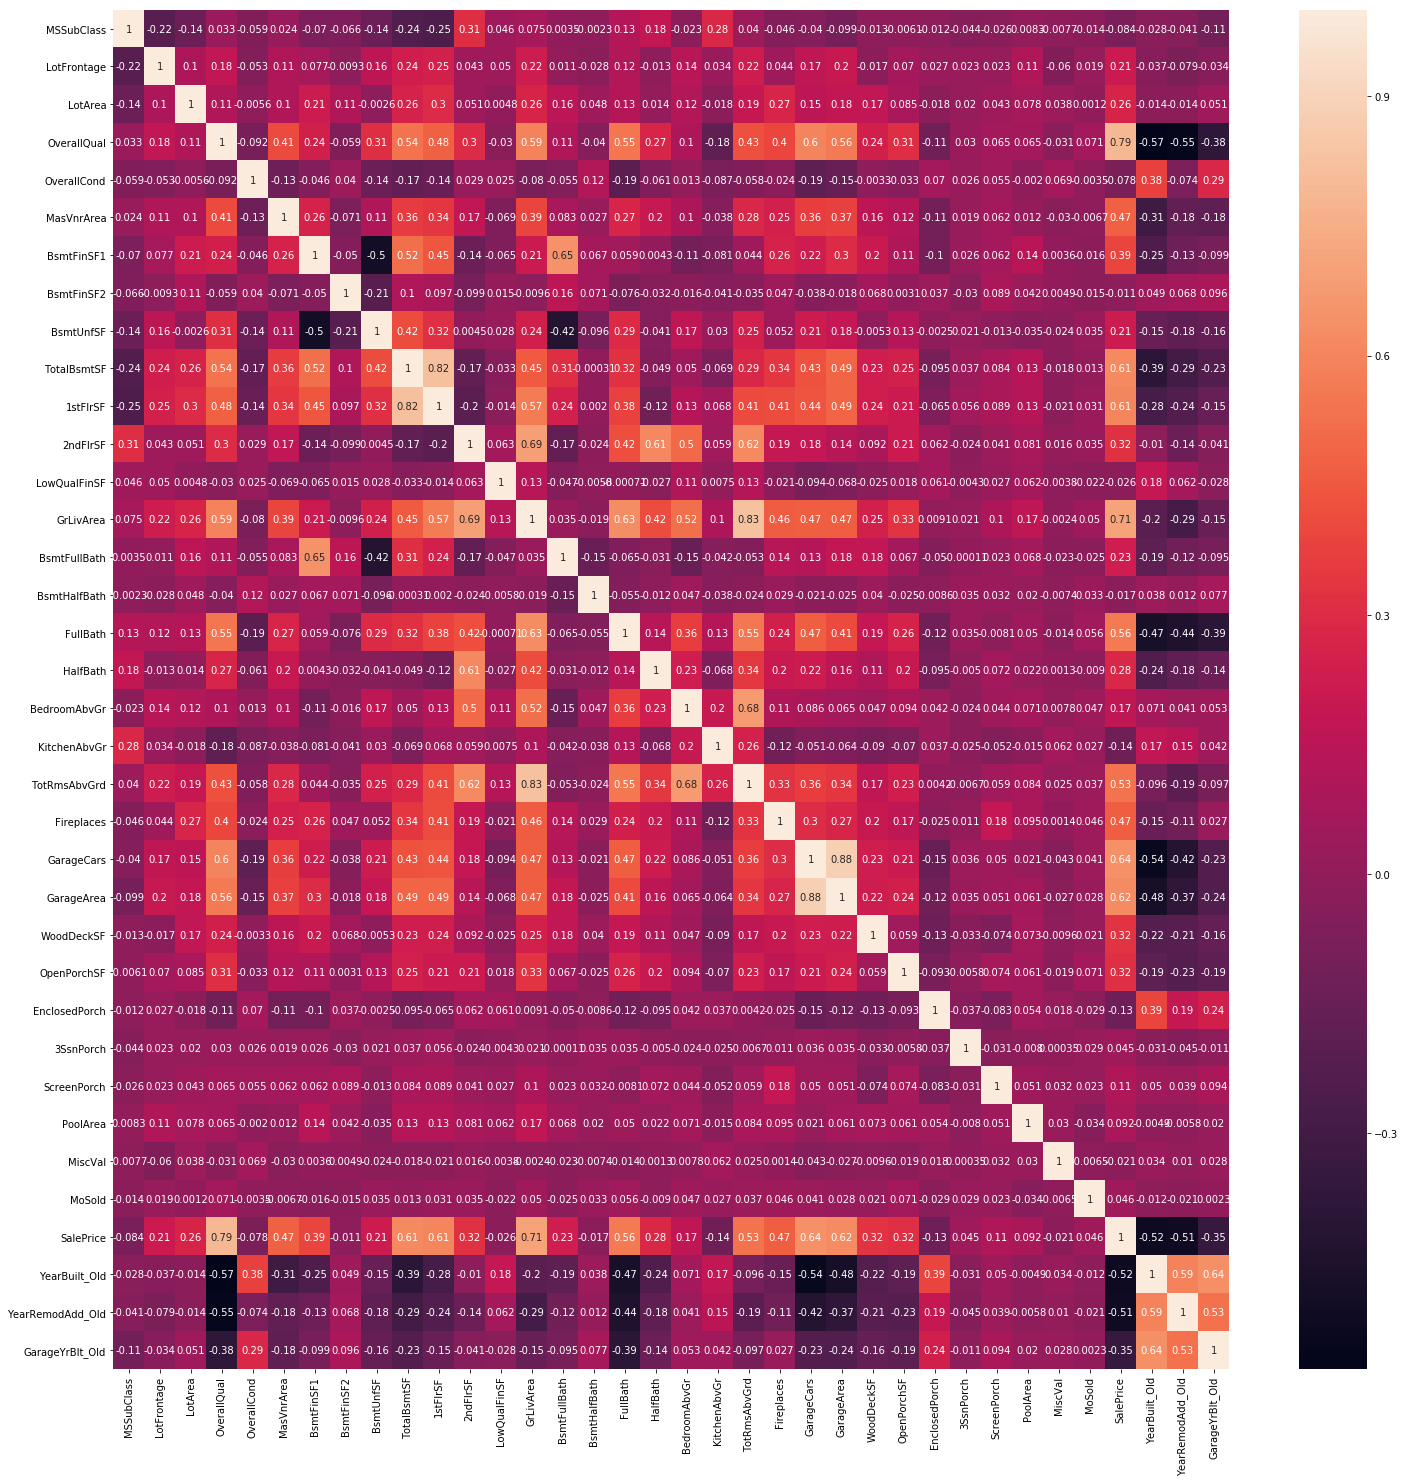

In [61]:
plt.figure(figsize= (25,25))
sns.heatmap(data.corr(),annot = True)

In [62]:
data.corr(method ='pearson')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old
MSSubClass,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.084284,-0.027850,-0.040581,-0.106388
LotFrontage,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.049981,0.220347,0.010514,-0.027856,0.120548,-0.012952,0.144494,0.034425,0.221396,0.044018,0.165229,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,0.209624,-0.036853,-0.078686,-0.033687
LotArea,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.014228,-0.013788,0.050809
OverallQual,0.032628,0.176561,0.105806,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.572323,-0.550684,-0.381595
OverallCond,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856,0.375983,-0.073741,0.287367
MasVnrArea,0.023573,0.105010,0.103321,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.472614,-0.311600,-0.176529,-0.183093
BsmtFinSF1,-0.069836,0.076670,0.214103,0.239666,-0.046231,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420,-0.249503,-0.128451,-0.098714
BsmtFinSF2,-0.065649,-0.009312,0.111170,-0.059119,0.040229,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378,0.049107,0.067759,0.095672
BsmtUnfSF,-0.140759,0.160829,-0.002618,0.308159,-0.136841,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.214479,-0.149040,-0.181133,-0.160083
TotalBsmtSF,-0.238518,0.238274,0.260833,0.537808,-0.171098,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,0.613581,-0.391452,-0.291066,-0.228684


#### Creating dummy variables for categorical variables

In [63]:
# subset all categorical variables
House_categorical = final_dataframe.select_dtypes(include=['object'])
House_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,OK,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Not OK Fireplace,Attchd,RFn,OK Garage,OK,Y,No Fence,None,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,OK,OK,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,OK Fireplace,Attchd,RFn,OK Garage,OK,Y,No Fence,None,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,OK,OK,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,OK Fireplace,Attchd,RFn,OK Garage,OK,Y,No Fence,None,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,OK,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,OK Fireplace,Detchd,Unf,OK Garage,OK,Y,No Fence,None,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,OK,OK,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,OK Fireplace,Attchd,RFn,OK Garage,OK,Y,No Fence,None,WD,Normal


In [64]:
# convert into dummies
house_dummies = pd.get_dummies(House_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_OK Fireplace,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_OK Garage,GarageCond_OK,PavedDrive_P,PavedDrive_Y,Fence_No Fence,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [65]:
# drop categorical variables 
final_dataframe = final_dataframe.drop(list(House_categorical.columns), axis=1)

In [66]:
final_dataframe = pd.concat([final_dataframe, house_dummies], axis=1)

In [67]:
final_dataframe.shape

(1441, 226)

#### Model Building

In [68]:
df_train,df_test = train_test_split(final_dataframe,train_size=0.7,test_size=0.3,random_state=100)


In [69]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

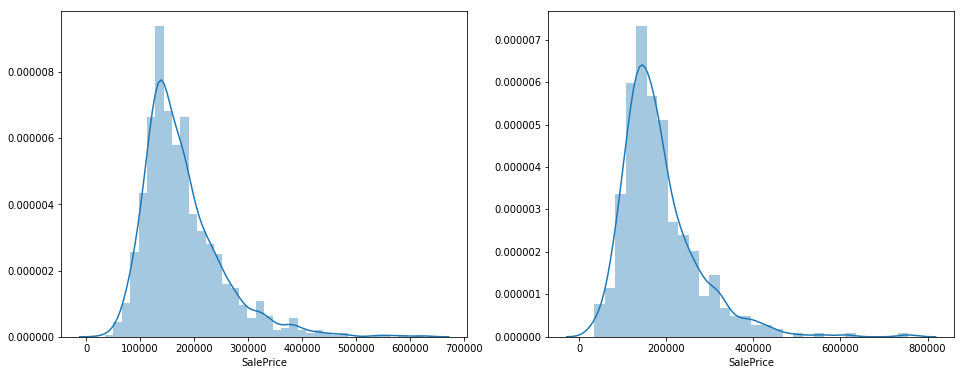

In [70]:
#plotting sales price from train and test before log
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [71]:
df_train['SalePrice']

106     100000
1305    325000
756     212000
826     109500
426     275000
1445    129000
390     119000
1441    149300
991     168000
1293    162900
125      84500
694     141500
1314    119000
147     222500
1127    259000
1297    140000
982     159895
509     124500
652     191000
51      114500
207     141000
559     234000
1389    131000
1114    117000
111     180000
1387    136000
596     114504
542     213250
953     172000
1338    200000
24      154000
407     177000
569     135960
467     146500
929     222000
156     109500
1082    192000
1064    154000
524     315750
332     284000
856     147000
260     176000
618     314813
1179     93000
783     165500
1349    122000
1153    120500
1045    139600
1381    237500
1056    185850
544     179665
553     108000
1077    138800
269     148000
185     475000
105     250000
1041    173000
1011    100000
1143     80000
1384    105000
738     179000
518     211000
164     152000
1238    142500
532     107500
807     223500
696      8

In [72]:
y_train = df_train.pop('SalePrice')
y_train = np.log(y_train)
X_train = df_train


In [73]:
y_test = df_test.pop('SalePrice')
y_test = np.log(y_test)
X_test = df_test

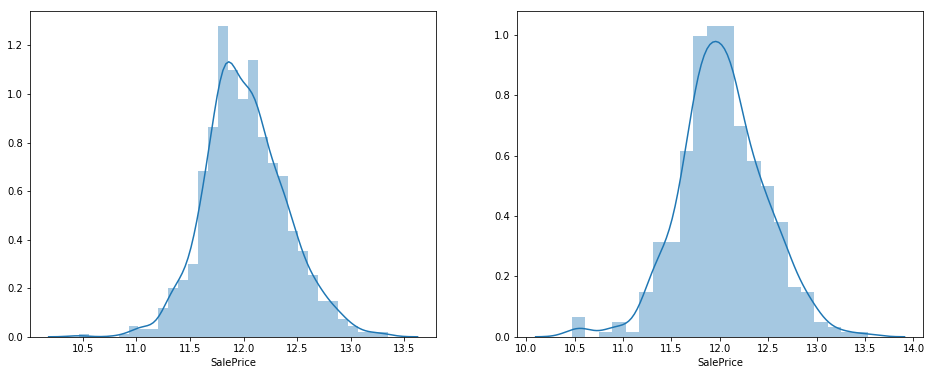

In [74]:
#plotting sales price after log checking for distribution
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(y_train)
plt.subplot(122)
sns.distplot(y_test)

## Lasso  

In [75]:
#initially starting with random alpha
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.9319635168132464
0.8723672316011518


In [76]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', 12.014),
 ('LotFrontage', -0.009),
 ('LotArea', 0.0),
 ('OverallQual', 0.029),
 ('OverallCond', 0.075),
 ('MasVnrArea', 0.049),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.024),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', -0.0),
 ('1stFlrSF', 0.043),
 ('2ndFlrSF', 0.002),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', -0.006),
 ('BsmtFullBath', 0.131),
 ('BsmtHalfBath', 0.02),
 ('FullBath', 0.0),
 ('HalfBath', 0.011),
 ('BedroomAbvGr', 0.003),
 ('KitchenAbvGr', -0.003),
 ('TotRmsAbvGrd', -0.014),
 ('Fireplaces', 0.007),
 ('GarageCars', 0.007),
 ('GarageArea', 0.013),
 ('WoodDeckSF', 0.024),
 ('OpenPorchSF', 0.01),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.002),
 ('PoolArea', 0.016),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YearBuilt_Old', -0.001),
 ('YearRemodAdd_Old', -0.003),
 ('GarageYrBlt_Old', -0.001),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', 0.019),
 ('Street_Pave', -0.03),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR

#### Will tune/improve the model with range of hyperparameters

In [77]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [78]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.028401,0.003583,0.001700,0.000640,0.001,{'alpha': 0.001},-0.077237,-0.072460,-0.075380,-0.081538,-0.089735,-0.071405,-0.077305,-0.069747,-0.070848,-0.076420,-0.076213,0.005677,1,-0.069279,-0.070534,-0.070472,-0.069652,-0.068361,-0.070524,-0.069273,-0.070528,-0.070629,-0.069271,-0.069852,0.000750
1,0.010398,0.001800,0.001500,0.000500,0.010,{'alpha': 0.01},-0.086948,-0.090184,-0.085937,-0.089831,-0.097874,-0.092912,-0.083089,-0.080519,-0.082704,-0.082607,-0.087269,0.005167,2,-0.085363,-0.085140,-0.085294,-0.084870,-0.083870,-0.085463,-0.085518,-0.086207,-0.086001,-0.085706,-0.085343,0.000616
2,0.009500,0.001204,0.001501,0.000500,0.100,{'alpha': 0.1},-0.158761,-0.171914,-0.145543,-0.160565,-0.170822,-0.164487,-0.148534,-0.141829,-0.151403,-0.151979,-0.156593,0.009873,3,-0.156204,-0.153165,-0.153988,-0.155636,-0.155083,-0.152662,-0.154202,-0.156316,-0.156971,-0.155209,-0.154944,0.001341
3,0.007899,0.000944,0.001401,0.000490,1.000,{'alpha': 1.0},-0.223417,-0.224110,-0.204175,-0.233967,-0.250864,-0.214569,-0.195037,-0.205523,-0.213138,-0.206240,-0.217119,0.015636,4,-0.214819,-0.215126,-0.217612,-0.214922,-0.213355,-0.216361,-0.218275,-0.217776,-0.216500,-0.218036,-0.216278,0.001581
4,0.008801,0.001327,0.001599,0.000489,5.000,{'alpha': 5.0},-0.257746,-0.261593,-0.259315,-0.310064,-0.308976,-0.248082,-0.227523,-0.239256,-0.285280,-0.260443,-0.265814,0.026171,5,-0.263525,-0.264226,-0.265468,-0.264912,-0.262868,-0.266116,-0.267132,-0.268163,-0.264578,-0.266245,-0.265323,0.001550


In [79]:
# Checking the best parameter(Alpha value)
print(model_cv.best_params_)
print(model_cv.best_score_)


{'alpha': 0.001}
-0.07621256450403854


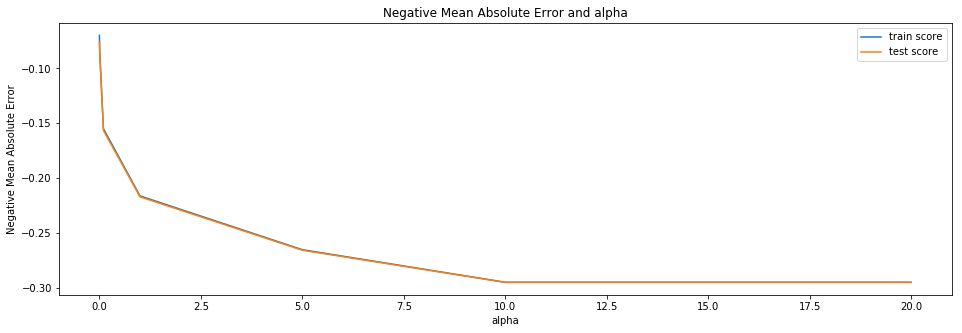

In [80]:
# plotting mean test and train scoes with alpha 
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_result_l['param_alpha'], cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'], cv_result_l['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [81]:
#using optimal value 0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.9319635168132464
0.8723672316011518


In [82]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

#### Top features using lasso

In [83]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)


,Featuere,Coef
0,MSSubClass,12.013517
14,BsmtFullBath,0.131109
59,Neighborhood_Edwards,0.086512
4,OverallCond,0.075380
195,FireplaceQu_OK Fireplace,0.075084
218,SaleType_Oth,0.068979
74,Neighborhood_StoneBr,0.057094
116,Exterior1st_CBlock,0.049346
5,MasVnrArea,0.048709
10,1stFlrSF,0.042503


### Ridge Regression

In [84]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param =  {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    3.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [85]:

cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009504,0.002423,0.001400,0.000483,0.0001,{'alpha': 0.0001},-0.093179,-0.088715,-0.077557,-0.085697,-0.078713,-0.069649,-0.084235,-0.069682,-0.095325,-0.078600,-0.082126,0.008438,26,-0.055983,-0.057174,-0.056742,-0.055777,-0.056939,-0.057569,-0.056009,-0.058496,-0.055599,-0.057354,-0.056764,0.000878
1,0.008400,0.001018,0.001500,0.000499,0.0010,{'alpha': 0.001},-0.093158,-0.088677,-0.077538,-0.085689,-0.078711,-0.069617,-0.084228,-0.069669,-0.095146,-0.078602,-0.082094,0.008412,25,-0.055986,-0.057176,-0.056743,-0.055778,-0.056940,-0.057571,-0.056012,-0.058499,-0.055609,-0.057356,-0.056767,0.000877
2,0.008299,0.001003,0.001301,0.000457,0.0100,{'alpha': 0.01},-0.092952,-0.088313,-0.077351,-0.085614,-0.078700,-0.069319,-0.084167,-0.069554,-0.093509,-0.078611,-0.081801,0.008181,24,-0.056014,-0.057200,-0.056753,-0.055790,-0.056959,-0.057596,-0.056046,-0.058527,-0.055703,-0.057371,-0.056796,0.000868
3,0.008099,0.000536,0.001303,0.000457,0.0500,{'alpha': 0.05},-0.092140,-0.086994,-0.076650,-0.085298,-0.078926,-0.068716,-0.084056,-0.069205,-0.088347,-0.078698,-0.080898,0.007489,23,-0.056145,-0.057297,-0.056836,-0.055848,-0.057076,-0.057723,-0.056170,-0.058622,-0.056100,-0.057441,-0.056926,0.000835
4,0.007502,0.000501,0.001600,0.000491,0.1000,{'alpha': 0.1},-0.091279,-0.085654,-0.076002,-0.084945,-0.079212,-0.068204,-0.084071,-0.068950,-0.084182,-0.078766,-0.080124,0.007055,22,-0.056292,-0.057412,-0.056952,-0.055943,-0.057227,-0.057861,-0.056318,-0.058722,-0.056511,-0.057533,-0.057077,0.000805


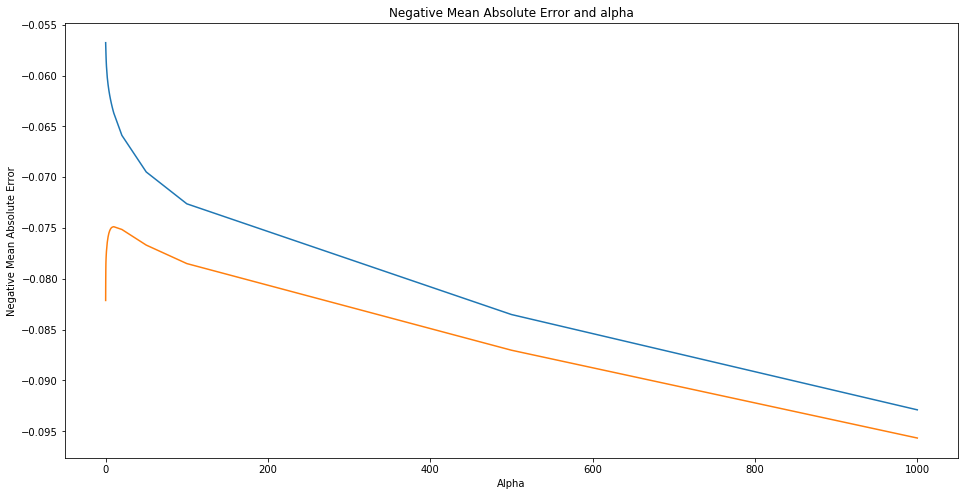

In [86]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.show()

In [87]:
# Checking the best parameter(Alpha value)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.07487035437473556


In [88]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(metrics.r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(metrics.r2_score(y_test,y_pred_test))

0.9436989701727971
0.8759738434271507


In [89]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

#### Top features using ridge

In [90]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,MSSubClass,11.956244
59,Neighborhood_Edwards,0.083902
195,FireplaceQu_OK Fireplace,0.078174
14,BsmtFullBath,0.067924
4,OverallCond,0.065805
75,Neighborhood_Timber,0.056947
224,SaleCondition_Partial,0.054462
116,Exterior1st_CBlock,0.054309
218,SaleType_Oth,0.051616
5,MasVnrArea,0.048885


##### Important features (considering common features)

*  MSSubClass
*  BsmtFullBath
*  FireplaceQu_OK Fireplace
*  OverallCond
*  SaleType_Oth
*  MasVnrArea
*  Neighborhood
*  Exterior1st_CBlock

In [ ]:
############### Assignment one end #######################

### Code for Q&A assignment part 2

#####  Question 1 Understanding the effect if we double the value of alpha

In [91]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.9226210001342618
0.8651991220014779


In [92]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [93]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)


,Featuere,Coef
0,MSSubClass,12.098786
14,BsmtFullBath,0.132807
4,OverallCond,0.082601
195,FireplaceQu_OK Fireplace,0.056690
59,Neighborhood_Edwards,0.056038
5,MasVnrArea,0.047402
218,SaleType_Oth,0.043815
10,1stFlrSF,0.043314
3,OverallQual,0.027748
7,BsmtFinSF2,0.025092


In [94]:
# Create a function called lasso,
def lasso_func(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = X_train.columns
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X_train,y_train )
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

In [95]:
df_data = lasso_func([.001, .002, 10])
df_data[df_data['Feature Name'].isin(['MSSubClass','OverallCond','Neighborhood_Edwards','BsmtFullBath',
                                      'FireplaceQu_OK Fireplace','MasVnrArea','SaleType_Oth','Neighborhood_StoneBr',
                                      'Exterior1st_CBlock','1stFlrSF'])]

,Feature Name,Alpha = 0.001000,Alpha = 0.002000,Alpha = 10.000000
0,MSSubClass,-0.008849,-0.009368,-0.0
4,OverallCond,0.048709,0.047402,-0.0
5,MasVnrArea,0.000000,0.000000,0.0
10,1stFlrSF,0.002273,0.002826,0.0
14,BsmtFullBath,0.020310,0.018135,0.0
59,Neighborhood_Edwards,-0.025479,-0.009827,-0.0
74,Neighborhood_StoneBr,0.036142,0.000000,0.0
116,Exterior1st_CBlock,-0.000000,-0.000000,-0.0
195,FireplaceQu_OK Fireplace,0.016425,0.006581,0.0
218,SaleType_Oth,0.000000,0.000000,-0.0


In [96]:
ridge = Ridge(alpha = 20)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(metrics.r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(metrics.r2_score(y_test,y_pred_test))

0.9398226372880216
0.8754139073313351


In [97]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [98]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,MSSubClass,11.990502
4,OverallCond,0.067891
59,Neighborhood_Edwards,0.066720
14,BsmtFullBath,0.066350
195,FireplaceQu_OK Fireplace,0.063767
5,MasVnrArea,0.049982
224,SaleCondition_Partial,0.045455
12,LowQualFinSF,0.044451
116,Exterior1st_CBlock,0.043132
75,Neighborhood_Timber,0.040719


In [99]:
def ridge_func(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    df = pd.DataFrame()
    
    df['Feature Name'] = X_train.columns
    
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        
        ridge.fit(X_train,y_train )
        
        column_name = 'Alpha = %f' % alpha

        df[column_name] = ridge.coef_
        
    return df

In [100]:
df_data = ridge_func([.001, .002, 10])

In [101]:
df_data[df_data['Feature Name'].isin(['MSSubClass','OverallCond','Neighborhood_Edwards','BsmtFullBath',
                                      'FireplaceQu_OK Fireplace','MasVnrArea','SaleType_Oth','Neighborhood_Timber',
                                      'Exterior1st_CBlock'])]

,Feature Name,Alpha = 0.001000,Alpha = 0.002000,Alpha = 10.000000
0,MSSubClass,-0.013743,-0.013708,-0.011167
4,OverallCond,0.043325,0.043329,0.048885
5,MasVnrArea,-0.005422,-0.005423,-0.004314
14,BsmtFullBath,0.018670,0.018673,0.020725
59,Neighborhood_Edwards,-0.063622,-0.063582,-0.047264
75,Neighborhood_Timber,-0.004293,-0.004302,-0.013349
116,Exterior1st_CBlock,-0.007070,-0.007163,-0.004905
195,FireplaceQu_OK Fireplace,0.013839,0.013835,0.018388
218,SaleType_Oth,0.073135,0.073141,0.013957


##### Question 3

In [102]:
#dropping top 5 features 
X_train_new = X_train.drop(['MSSubClass','BsmtFullBath','Neighborhood_Edwards','FireplaceQu_OK Fireplace','SaleType_Oth'],axis=1)

In [103]:
X_test_new =  X_test.drop(['MSSubClass','BsmtFullBath','Neighborhood_Edwards','FireplaceQu_OK Fireplace','SaleType_Oth'],axis=1)

In [104]:
df_train_new = df_train.drop(['MSSubClass','BsmtFullBath','Neighborhood_Edwards','FireplaceQu_OK Fireplace','SaleType_Oth'],axis=1)

In [105]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.9299987599516837
0.8716083202775038


In [106]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [107]:
lasso_coef.sort_values(by='Coef',ascending=False).head(5)


,Featuere,Coef
0,LotFrontage,12.010442
13,BsmtHalfBath,0.127144
57,Neighborhood_Gilbert,0.086038
192,GarageType_Attchd,0.076526
3,OverallCond,0.074234
